In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import plotly.express as px

import plotly.io as pio
pio.renderers.default='iframe'
from plotly.subplots import make_subplots
import plotly.graph_objects as go

sns.set_style('whitegrid', {'grid.linestyle': u'--'})
matplotlib.rc('pdf', fonttype=42)

Populating the interactive namespace from numpy and matplotlib


In [73]:
# alle excel dateien im verzeichnis:
#fi = !ls *.xlsx

# alle dateien einlesen und in mdata zusammenführen
#for i in np.arange(len(fi)):
#    skpr = np.where(pd.read_excel(fi[i]).iloc[:,0]=='MKZ')[0][0]+1
#    if i == 0:
#        mdata = pd.read_excel(fi[i],skiprows=skpr)
#    else:
#        mdata = pd.concat([mdata,pd.read_excel(fi[i],skiprows=skpr)],axis=0)

# Datum als Zeitstempel
#mdata['Datumx'] = pd.to_datetime(mdata.Datum)#,'%d.%m.%Y')

#mdata.to_csv('muenzbach_mdata.csv')
mdata = pd.read_csv('muenzbach_mdata.csv',index_col=0)
mdata['Datumx'] = pd.to_datetime(mdata.Datum)

In [74]:
# Messstationen
mdata.MKZ.unique()

array(['OBF32900', 'OBF32901', 'OBF32903', 'OBF32906'], dtype=object)

In [75]:
# Variablen
pd.Series(mdata.Parameter.unique())

0                           Ammonium-Stickstoff
1                                         Arsen
2                                       Cadmium
3                                       Chlorid
4                                         Eisen
5                                   Fluoranthen
6                               Gesamt-Phosphor
7                             Gesamt-Stickstoff
8                                        Kupfer
9              Elektrische Leitfähigkeit (20°C)
10                                       Nitrat
11                            Nitrit-Stickstoff
12                             Sauerstoffgehalt
13                          Sauerstoffsättigung
14                                       Sulfat
15    gesamter organisch gebundener Kohlenstoff
16                             Wassertemperatur
17                                         Zink
18                                 o-Phosphat-P
19                              pH-Wert (Labor)
20                               ortho-P

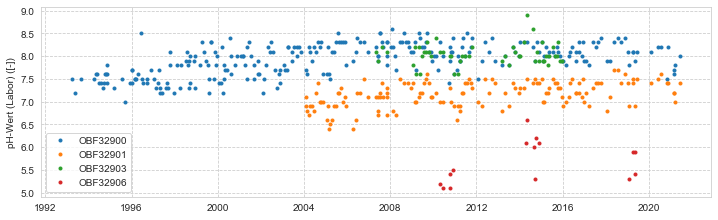

In [76]:
# hier kann man j verändern und damit die jeweilige Variable als Zeitreihe plotten
figsize(12,3.5)
j=19
dummy = mdata.loc[mdata.Parameter == mdata.Parameter.unique()[j]]
for MKZ in mdata.MKZ.unique():
    plot(dummy.loc[dummy.MKZ==MKZ,'Datumx'],dummy.loc[dummy.MKZ==MKZ,'Ergebnis'],'.',label=MKZ)
    legend()
    ylabel(mdata.Parameter.unique()[j]+' ('+dummy.iloc[0,:].Einheit+')')

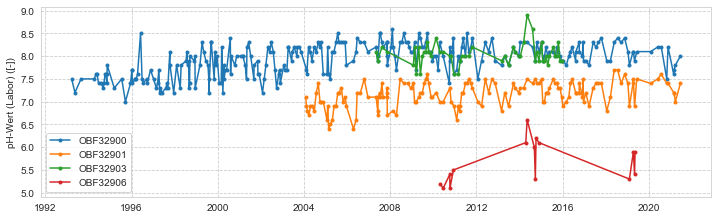

In [8]:
#oder mit linien
figsize(12,3.5)
j=19
dummy = mdata.loc[mdata.Parameter == mdata.Parameter.unique()[j]]

for MKZ in mdata.MKZ.unique():
    dummy2 = pd.DataFrame(dummy.loc[dummy.MKZ==MKZ,'Ergebnis'].values,index=dummy.loc[dummy.MKZ==MKZ,'Datumx'].values, columns=[MKZ])
    dummy2 = dummy2.sort_index()
    plot(dummy2, '.-', label = MKZ)
    legend()
    ylabel(mdata.Parameter.unique()[j]+' ('+dummy.iloc[0,:].Einheit+')')

In [9]:
# neuer Zeitstempel in Woche seit 01.01.1993
mdata['weekx'] = mdata['Datumx'].dt.isocalendar().week+(mdata['Datumx'].dt.isocalendar().year-1993)*52

In [10]:
# alle Daten in eine große Tabelle mit Variablen als Spalten umbauen
xdata = pd.DataFrame(columns=np.append(mdata.Parameter.unique(),np.append('Date','MKZ')))
for week in mdata['weekx'].unique():
    for dat in mdata['Datumx'].unique():
        for MKZ in mdata.loc[(mdata['weekx']==week) & (mdata['Datumx']==dat),'MKZ'].unique():
            try:
                xdata = pd.concat([xdata,pd.DataFrame(np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ) & (mdata['Datumx']==dat),'Ergebnis'].values,np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ) & (mdata['Datumx']==dat),'Datumx'].iloc[0],MKZ)),index=np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ) & (mdata['Datumx']==dat),'Parameter'].values,np.append('Date','MKZ')),columns=[week]).T],axis=0)
            except:
                xdata = pd.concat([xdata,pd.DataFrame(np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ) & (mdata['Datumx']==dat) & (mdata['Probenbezug'] == 'Gelöster Anteil'),'Ergebnis'].values,np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ) & (mdata['Datumx']==dat) & (mdata['Probenbezug'] == 'Gelöster Anteil'),'Datumx'].iloc[0],MKZ)),index=np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ) & (mdata['Datumx']==dat) & (mdata['Probenbezug'] == 'Gelöster Anteil'),'Parameter'].values,np.append('Date','MKZ')),columns=[week]).T],axis=0)
                
xdata[xdata.columns[:-2]] = xdata[xdata.columns[:-2]].astype(float)

In [11]:
xdata.head(6)

,Ammonium-Stickstoff,Arsen,Cadmium,Chlorid,Eisen,Fluoranthen,Gesamt-Phosphor,Gesamt-Stickstoff,Kupfer,Elektrische Leitfähigkeit (20°C),...,Sauerstoffsättigung,Sulfat,gesamter organisch gebundener Kohlenstoff,Wassertemperatur,Zink,o-Phosphat-P,pH-Wert (Labor),ortho-Phosphat,Date,MKZ
12,6.24,NaN,13.4,37.0,0.11,4.0,1.404,25.6,9.4,507.0,...,89.0,146.0,NaN,7.2,1780.0,0.720,7.5,NaN,1993-03-22,OBF32900
20,8.50,NaN,3.9,37.0,0.28,30.0,0.796,20.0,9.4,486.0,...,81.0,112.0,NaN,10.8,1000.0,0.590,7.2,NaN,1993-05-17,OBF32900
34,6.21,NaN,1.7,25.0,0.24,NaN,0.446,9.7,8.1,323.0,...,78.0,80.0,NaN,15.0,220.0,0.250,7.5,NaN,1993-08-28,OBF32900
73,7.37,NaN,1.8,35.0,0.05,NaN,2.280,19.0,10.0,452.0,...,77.0,146.0,NaN,13.7,871.0,0.995,7.6,NaN,1994-05-26,OBF32900
88,16.20,NaN,0.5,30.5,0.12,NaN,2.145,19.5,10.0,433.0,...,56.0,110.0,NaN,12.5,1017.0,0.957,7.3,NaN,1994-09-06,OBF32900
77,10.20,NaN,2.2,39.0,0.09,NaN,1.800,14.4,10.0,475.0,...,59.0,126.0,NaN,15.1,1029.0,0.707,7.4,NaN,1994-06-22,OBF32900


In [12]:
#rename columns to avoid MINUS and SPACES
xdata.columns = ['AmmoniumStickstoff', 'Arsen', 'Cadmium', 'Chlorid', 'Eisen',
       'Fluoranthen', 'GesamtPhosphor', 'GesamtStickstoff', 'Kupfer',
       'ElektrischeLeitfähigkeit20C', 'Nitrat', 'NitritStickstoff',
       'Sauerstoffgehalt', 'Sauerstoffsättigung', 'Sulfat',
       'GesamtCorg', 'Wassertemperatur', 'Zink',
       'oPhosphatP', 'pHLabor', 'orthoPhosphat', 'Date', 'MKZ']

In [13]:
#xdata[['Ammonium-Stickstoff', 'Arsen', 'Cadmium', 'MKZ']].describe()
xdata[xdata.columns[:-2]].describe()


,AmmoniumStickstoff,Arsen,Cadmium,Chlorid,Eisen,Fluoranthen,GesamtPhosphor,GesamtStickstoff,Kupfer,ElektrischeLeitfähigkeit20C,...,NitritStickstoff,Sauerstoffgehalt,Sauerstoffsättigung,Sulfat,GesamtCorg,Wassertemperatur,Zink,oPhosphatP,pHLabor,orthoPhosphat
count,496.000000,485.000000,507.000000,496.000000,353.000000,57.000000,194.000000,85.000000,507.000000,240.0000,...,496.000000,239.000000,239.000000,496.000000,168.000000,240.000000,511.000000,496.000000,495.000000,68.000000
mean,1.271550,141.330515,10.977219,94.064718,3141.716093,1014.771930,0.420031,13.209412,77.589349,612.6156,...,0.205111,9.762343,94.121339,72.352823,6.166071,12.503333,1164.150098,0.121879,7.641616,0.172531
std,3.370704,506.506479,20.017608,56.959522,12075.138323,1016.429026,0.696687,8.463361,268.932755,294.2827,...,0.414201,1.820496,14.592429,26.208537,3.036166,5.069796,1863.463952,0.230681,0.590071,0.197272
min,0.020000,0.800000,0.100000,3.000000,0.020000,1.000000,0.040000,5.000000,2.000000,96.0000,...,0.005000,0.300000,5.000000,23.000000,2.400000,0.000000,6.700000,0.010000,5.100000,0.030700
25%,0.059750,13.000000,1.050000,53.000000,0.030000,12.000000,0.080000,7.800000,6.200000,432.2500,...,0.020750,9.000000,95.000000,52.000000,4.400000,7.700000,149.000000,0.010000,7.300000,0.037000
50%,0.092000,17.000000,3.000000,83.000000,0.050000,870.000000,0.175000,11.000000,9.200000,572.5000,...,0.059500,9.600000,98.000000,71.000000,5.300000,13.250000,440.000000,0.044500,7.700000,0.090500
75%,0.270000,24.000000,9.700000,130.000000,0.100000,1700.000000,0.358500,15.000000,17.000000,787.7500,...,0.210000,11.000000,101.000000,90.000000,7.300000,16.600000,1200.000000,0.122500,8.100000,0.245000
max,24.000000,5500.000000,120.000000,370.000000,67000.000000,4200.000000,4.200000,64.000000,2800.000000,1980.0000,...,3.700000,16.800000,124.000000,150.000000,29.000000,22.500000,12000.000000,2.050000,8.900000,0.920000


In [14]:
# simple correlation calculation
cmx_sp = xdata.corr(method='spearman') #method kann sein: 'pearson','spearman','kendall'
cmx_p = xdata.corr(method='pearson')
cmx_sp

#np.fill_diagonal(cmx.values,np.nan)
#cmx.max()

,AmmoniumStickstoff,Arsen,Cadmium,Chlorid,Eisen,Fluoranthen,GesamtPhosphor,GesamtStickstoff,Kupfer,ElektrischeLeitfähigkeit20C,...,NitritStickstoff,Sauerstoffgehalt,Sauerstoffsättigung,Sulfat,GesamtCorg,Wassertemperatur,Zink,oPhosphatP,pHLabor,orthoPhosphat
AmmoniumStickstoff,1.000000,-0.033983,0.207809,-0.060100,0.151568,0.714980,0.575525,0.647554,0.091373,0.176769,...,0.355484,-0.262097,-0.443631,0.438861,-0.079171,-0.074397,0.417958,0.248852,-0.184247,0.570031
Arsen,-0.033983,1.000000,0.105381,0.235423,0.192210,0.707477,0.436114,-0.162443,0.251311,0.396281,...,-0.136720,-0.333941,0.024585,0.331699,0.134213,0.430571,0.114227,0.348058,0.325071,0.635533
Cadmium,0.207809,0.105381,1.000000,-0.133241,0.088802,0.700118,-0.197007,-0.052681,0.802883,0.178102,...,-0.062287,0.221620,0.181497,0.079316,-0.532987,-0.079515,0.897460,-0.470091,-0.408455,0.190614
Chlorid,-0.060100,0.235423,-0.133241,1.000000,-0.286826,-0.560321,0.211302,-0.074577,-0.076059,0.905777,...,0.144421,0.141412,0.406738,0.221818,0.140150,0.152603,-0.270978,0.338376,0.699524,0.597192
Eisen,0.151568,0.192210,0.088802,-0.286826,1.000000,0.810510,0.042804,0.464519,0.162401,-0.154452,...,-0.098212,-0.180987,-0.322363,0.036856,0.148446,0.019332,0.188012,0.073817,-0.368675,-0.622741
Fluoranthen,0.714980,0.707477,0.700118,-0.560321,0.810510,1.000000,0.656213,0.155963,0.747256,0.040811,...,-0.163122,-0.013771,0.185234,0.528514,0.477346,0.216408,0.708805,0.633211,-0.248716,0.737865
GesamtPhosphor,0.575525,0.436114,-0.197007,0.211302,0.042804,0.656213,1.000000,0.668168,-0.003281,0.458818,...,0.161819,-0.444958,-0.332368,0.636833,0.482316,0.225125,0.007694,0.925367,0.471874,0.911952
GesamtStickstoff,0.647554,-0.162443,-0.052681,-0.074577,0.464519,0.155963,0.668168,1.000000,-0.056980,0.158214,...,0.283880,-0.315110,-0.427527,0.494850,-0.101325,-0.124265,0.104620,0.577125,0.043929,NaN
Kupfer,0.091373,0.251311,0.802883,-0.076059,0.162401,0.747256,-0.003281,-0.056980,1.000000,0.151793,...,-0.082507,0.084599,0.213976,0.060718,-0.269707,0.095270,0.744475,-0.273462,-0.250118,0.317645
ElektrischeLeitfähigkeit20C,0.176769,0.396281,0.178102,0.905777,-0.154452,0.040811,0.458818,0.158214,0.151793,1.000000,...,0.024513,0.008719,0.163875,0.531838,0.210588,0.123765,0.116866,0.458815,0.727419,0.691191


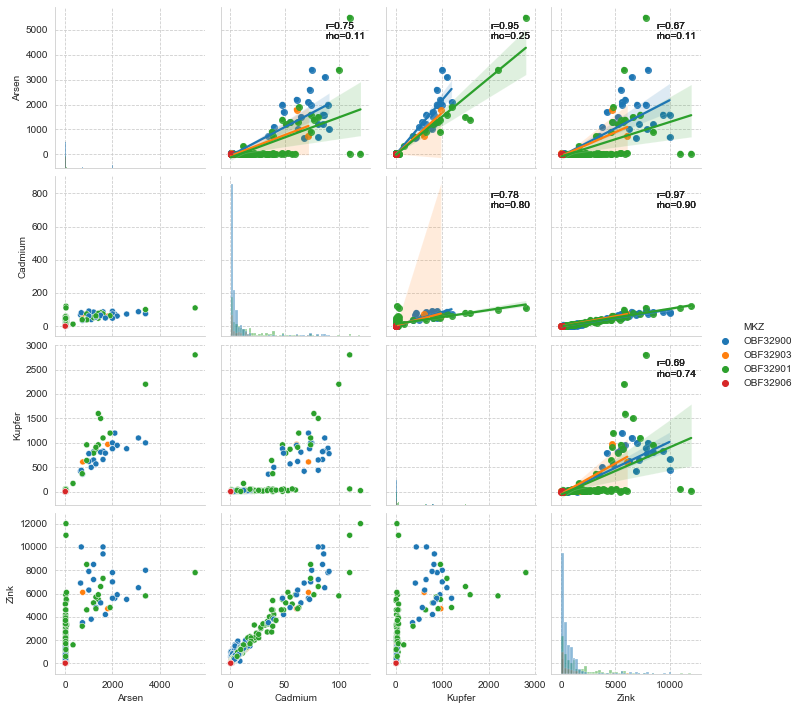

In [15]:
#pd.DataFrame(np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ),'Ergebnis'].values,np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ),'Datumx'].iloc[0],MKZ)),index=np.append(mdata.loc[(mdata['weekx']==week) & (mdata['MKZ']==MKZ),'Parameter'].values,np.append('Date','MKZ')),columns=[week]).T
#mdata.Probenbezug.hist()
figsize(18,18)

import scipy as sp 
import statsmodels.api as sm

def annotate(data1,data2, **kws):
    #r, p = sp.stats.pearsonr(data1[(data1!=np.isfinite(data1)) & (data2!=np.isfinite(data2))], data2[(data1!=np.isfinite(data1)) & (data2!=np.isfinite(data2))])
    #slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data1[(data1!=np.isfinite(data1)) & (data2!=np.isfinite(data2))], data2[(data1!=np.isfinite(data1)) & (data2!=np.isfinite(data2))])
    ax = plt.gca()
    #ax.text(.45, .75, 'r2={:.2f}, p={:.3f}\nr={:.2f}, rho={:.2f}'.format(r2,p_value,cmx_p.loc[data1.name,data2.name], cmx_sp.loc[data1.name,data2.name]),transform=ax.transAxes)
    ax.text(.7, .8, 'r={:.2f}\nrho={:.2f}'.format(cmx_p.loc[data1.name,data2.name], cmx_sp.loc[data1.name,data2.name]),transform=ax.transAxes)

#sns.pairplot(xdata, x_vars=['Fluoranthen', 'Gesamt-Phosphor', 'Gesamt-Stickstoff'], y_vars=['Ammonium-Stickstoff', 'Arsen', 'Cadmium'])#, hue = 'MKZ')
g = sns.pairplot(xdata[['Arsen', 'Cadmium', 'Kupfer','Zink','MKZ']], kind='scatter', diag_kind='hist', hue='MKZ')
g.map_upper(sns.regplot)
g.map_upper(annotate)

#'Sulfat','orthoPhosphat','Sauerstoffsättigung','Fluoranthen','Eisen'

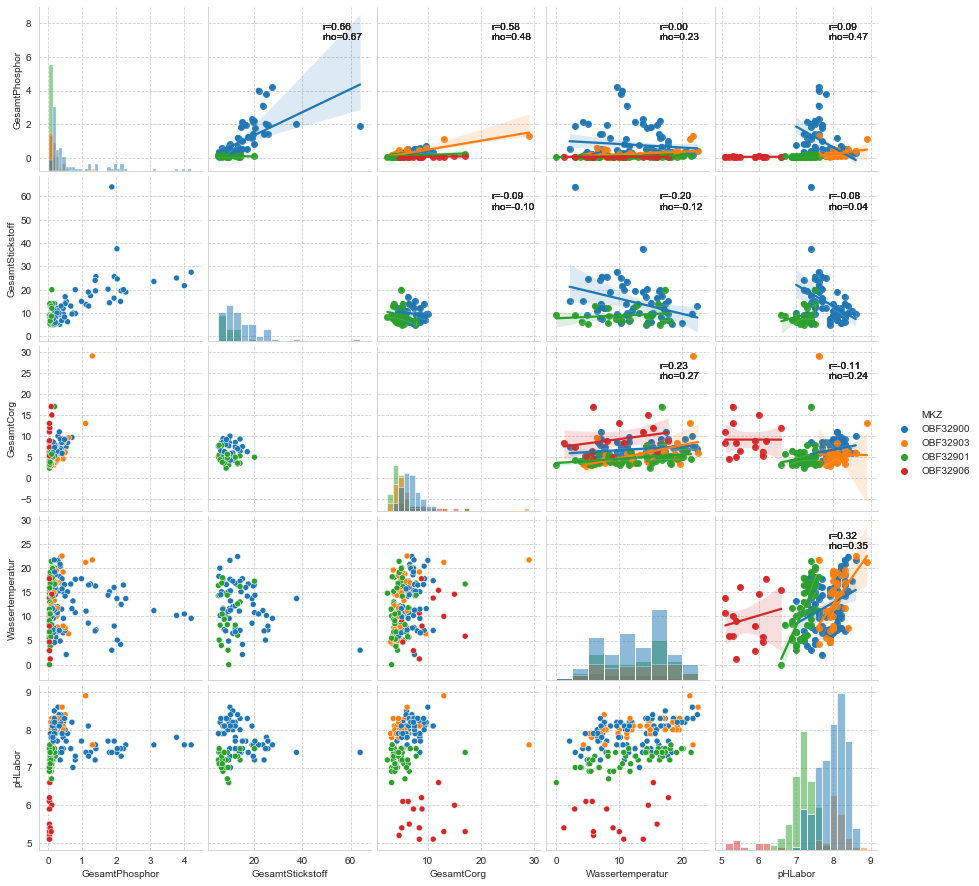

In [16]:
g = sns.pairplot(xdata[['GesamtPhosphor', 'GesamtStickstoff',  'GesamtCorg', 'Wassertemperatur','pHLabor','MKZ']], kind='scatter', diag_kind='hist', hue='MKZ')
g.map_upper(sns.regplot)
g.map_upper(annotate)

In [17]:
#und hier ein Plot zum Zoomen...
fig = px.scatter(xdata, x='Date', y='GesamtPhosphor', color='MKZ')
fig.update_layout({'template': 'none'})

In [43]:
#schnelle Funktion für Lineares Modell mit Plot:

def linfit(df,c1,c2,zeroi=True,pltx=True,applymod=False):
    '''Linear regeression of two columns in a data frame with plot
    df :: pandas dataframe
    c1 :: string with name of first column
    c2 :: string with name of second column
    zeroi :: supress use of intercept?
    '''
    import statsmodels.formula.api as smf 
    from statsmodels.sandbox.regression.predstd import wls_prediction_std
    #import statsmodels.api as sm
    from scipy import stats
    
    df = df.sort_values(by=c2)[[c1,c2]].reset_index()
    if zeroi: #zero intercept
        result = smf.ols(formula=c1+' ~ '+c2+' - 1', data=df).fit()
    else:
        result = smf.ols(formula=c1+' ~ '+c2, data=df).fit()
    y_hat = result.predict(df[c2])
    y_err = df[c1].values - y_hat
    s_err = np.sum(np.power(y_err, 2))
    mean_x = df[c2].mean()
    
    #confidence intervals
    n = len(df)
    x_pred = np.linspace(df[c2].min(), df[c2].max(), 50)
    y_pred = result.predict(pd.Series(x_pred,name=c2))
    dof = n - result.df_model - 1
    t = stats.t.ppf(1-0.05, df=dof)
    conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((x_pred-mean_x),2) / ((np.sum(np.power(x_pred,2))) - n*(np.power(mean_x,2))))))
    upper = y_pred + abs(conf)
    lower = y_pred - abs(conf)
    
    #prediction interval
    #sdev, lower2, upper2 = wls_prediction_std(result, exog=sm.add_constant(x_pred), alpha=0.05)
    
    if pltx & applymod:
        ax = plt.subplot(gs[0, 0])
        ax.scatter(df[c2], df[c1]/result.params[0], alpha=0.5)
        ax.plot(x_pred, y_pred/result.params[0], '-', linewidth=2)
        ax.fill_between(x_pred, lower/result.params[0], upper/result.params[0], color='#888888', alpha=0.4)
        ax.text(.1, .75, 'R2={:.2f}\nMSE={:.2f}\ni={:.2f}\na={:.2f}'.format(result.rsquared,result.mse_resid,result.params[0],result.params[1]),transform = ax.transAxes)
        #ax.fill_between(x_pred, lower2, uppe2, color='#888888', alpha=0.1)
        
        return result
    elif pltx & ~applymod:
        ax = plt.subplot(gs[0, 0])
        ax.scatter(df[c2], df[c1], alpha=0.5)
        ax.plot(x_pred, y_pred, '-', linewidth=2)
        ax.fill_between(x_pred, lower, upper, color='#888888', alpha=0.4)
        return result
    else:
        return result,x_pred,y_pred,lower,upper,conf

/Users/cojack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning:

invalid value encountered in sqrt



Text(0.5, 0, 'orthoPhosphat')

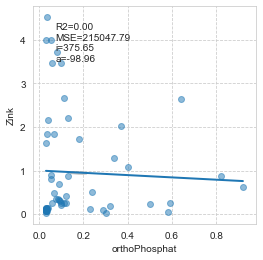

In [52]:
# Hier kann man das schnell anwenden

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 1)
figsize(4,4)
resx = linfit(xdata,'Zink', 'orthoPhosphat',False,True,True)
ylabel('Zink')
xlabel('orthoPhosphat')


In [53]:
# und man hat sofort auch das Modell mit den Eigenschaften
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html
#resx.params
resx.rsquared

0.0019442373370921473

## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
#plot function 
def PCAplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

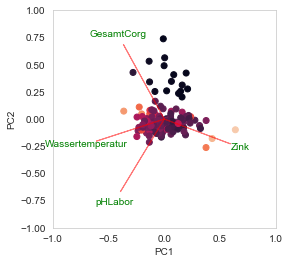

In [68]:
xdata_sub = xdata[['Arsen', 'Zink', 'GesamtCorg', 'Wassertemperatur','pHLabor']].dropna()
# 1. Spalte >> target
# ab 2. Spalte >> predictor

X = xdata_sub.iloc[:,1:].values #predictors
y = xdata_sub.iloc[:,0].values #target 'Arsen', 'Cadmium', 'Kupfer','Zink'

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

PCAplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),xdata_sub.columns[1:])